# Geolocalización

## Parámetros

In [1]:
BASE_DIR = '/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data' # Mac
# BASE_DIR = r'D:\Users\efras\Documents\EF\Contests\Datathon_CDMX\data' # Windows
ILE_NAME = 'ile_limpio_cluster'
GEO_NAME = 'localidades'

## Importar

### Clases

In [2]:
from mariachis.localidades import GeoLoc

ile_class = GeoLoc(BASE_DIR, ILE_NAME)
geo_class = GeoLoc(BASE_DIR, GEO_NAME, iso_country_code='MX')

### ILE limpio y con cluster

In [3]:
ile = ile_class.full_import(api=False)
ile.sample()

Archivo con nombre ile_limpio_cluster.csv fue encontrado en
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data
Con 79383 renglones y 73 columnas


,año,mes,fingreso,autoref,edocivil_descripcion,edad,desc_derechohab,nivel_edu,ocupacion,religion,...,rango_p_diasgesta,rango_fsexual_vs_menarca,rango_edad_vs_menarca,rango_edad_vs_fsexual,antes_vs_despues,antes_vs_despues_detalle,cluster,nombre,conclusión general,características de minorías
23988,2019.0,FEBRERO,2019-02-05,DESCONOCIDO,CASADX,30.0,NINGUNO,PREPARATORIA,TRAB_HOGAR_NO_REMUNERADX,NINGUNA,...,DESCONOCIDO,01 a 03,>= 18,>= 13,DIFERENTE,"antes: NINGUNO, después: CONDON",F,Jóvenes de 22-25 desempleadas con decisión de ...,"Alta frecuencia en 2020, personas de diferente...",Personas separadas. Personas desempleadas. Per...


### Localidades por URL

In [4]:
geo = geo_class.get_data()
geo.sample()

Archivo: localidades.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,country_code,postal_code,place_name,state_name,state_code,province_name,province_code,community_name,community_code,lat,lon,accuracy
104181,MX,76814,Loma de la Valla (Buenavista de la Valla),Querétaro,22,San Juan del Río,016,,,20.4837,-100.0061,3


## Municipios

### Transformación

In [5]:
geo = geo_class.wrangling_geo(geo)
geo.sample()

Archivo: localidades_geoloc.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data


,group,geometry,country_code,state_name,state_code,province_name,province_code,lat,lon,area,boundary,centroid,convex_hull,centroid_lat,centroid_lon
1683,"Puebla, Puebla","MULTIPOLYGON (((-98.325 19.004, -98.325 19.007...",MX,Puebla,21,Puebla,114,19.0479,-98.1907,0.093684,"MULTILINESTRING ((-98.325 19.004, -98.325 19.0...",POINT (-98.201 19.020),"POLYGON ((-98.203 18.799, -98.208 18.799, -98....",-98.201481,19.020144


### Mapa

<AxesSubplot:>

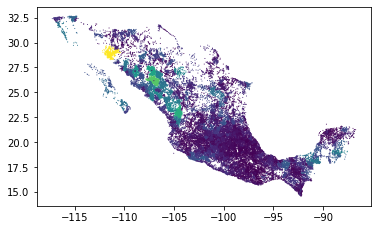

In [6]:
geo.plot('area')

## Unión

In [7]:
df = ile_class.merge_with_ile(ile, geo)
print(df.shape)
df.sample()

Archivo: ile_limpio_cluster_geoloc.csv fue exportado exitosamente en:
/Users/efraflores/Desktop/EF/Contests/Datathon_CDMX/data
(68442, 90)


,index,año,mes,fingreso,autoref,edocivil_descripcion,edad,desc_derechohab,nivel_edu,ocupacion,...,province_name,province_code,lat,lon,area,boundary,centroid,convex_hull,centroid_lat,centroid_lon
17391,31315,2020.0,ABRIL,2020-04-17,DESCONOCIDO,SOLTERX,19.0,NINGUNO,LICENCIATURA,ESTUDIANTE,...,Gustavo A. Madero,005,19.4787,-99.1147,0.037662,"LINESTRING (-99.012 19.429, -99.012 19.429, -9...",POINT (-99.115 19.484),"POLYGON ((-99.118 19.342, -99.123 19.342, -99....",-99.115067,19.484446
